# Support Vector Regression (SVR)
In simple linear regression , curve is plotted to minimise the difference b/w actual to that of predicted value using Least square method (Sum(y1-y1ˆ)ˆ2)

SVR : Regression method in which curve is plotted using epsilon tube on either sides with distance = epsilon from regression line. Data points inside our tube will be disregarding of error (no error if points inside tube) , means tube is a margin of error that we're allowing & not caring about error inside here.

Points outside our Epsilon tube are to be considered for error & measured by distance b/w tube & datapoint lying outside.

Ei+(Eiˆ*) - point above tube + below to be minimised

Called as support vector regression as every points represent a vector & points lying outside are **SUPPORT VECTORS** as they dictating the tube structure & how it's created

Any point outside the Epsilon tube is a Support Vector.

Support vector Regression is a Non linear regression Model.

Feature scaling is done priorly in SVR as in linear regression we have coefficients that can deal with high values of features which is missing in SVR.

To implement relation b/w Independent var X and dependent var y , feature scaling is required.

Not required to split dataset in Train & Test data in SVR as maximum data/leverage data required for training to implement a correlation b/w position level and salary.

In datapreprocessing part ,feature scaling is applied only to X_test & train not y ,because we have y matrix as 0 & 1 values only.

We need to apply feature scaling to matrix y also as we have Salary as varying values & we don't have any equation like in linear & multiple regression (y=b0+b1x1+--) here.

SVR Model will not work at all , if we don't apply feature scaling as model will neglect the varying values.

Also Feature scaling is not applied to DUMMY Variable obtained via onehotencoder and dependent var with binary values(0&1) as values are already in the right range.

Inverse feature scaling is also done to obtain back transformed values.

Mean and standard deviation is applied on columns in feature scaling.

Two different Standard scaler object to be created so as to perform mean & Standard deviation on both matrices.

Standarisation scale values b/w +3 & -3

Sklearn - for machine learning
Tensorflow & Pytorch - library for Deep learning (neural networks)

------------------------------------------------

Fit & transform working

**fit(df):**

Calculates the mean and variance for each feature in the dataset df

Mean for Feature1: (1 + 2 + 3 + 4 + 5) / 5 = 3

Mean for Feature2: (10 + 20 + 30 + 40 + 50) / 5 = 30

Variance for Feature1: variance calculation

Variance for Feature2: variance calculation

Stores these values internally in the StandardScaler object.

output
Mean (fit): [ 3. 30.]

Variance (fit): [ 2. 200.]


**transform(df):**

Uses the mean and variance stored during fit to standardize the data.

For each value in the dataset:

Transforms each value by subtracting the mean and dividing by the standard deviation.

For example, the first value in Feature1: (1 - 3) / sqrt(2) = -1.414 (approx)

Output

Transformed DataFrame (transform):
[[-1.41421356 -1.41421356]
 [-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [ 1.41421356  1.41421356]]

**fit_transform(df):**

Performs both the fit and transform steps in one call.

First, it calculates and stores the mean and variance.

Then, it transforms the dataset using these stored values.


## Importing the libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [24]:
dataset = pd.read_csv('Position_Salaries.csv')
X=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values

print(X)
print("\n")
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


# Reshape y into 2d array where salarys displayed vertically

Required as for feature scaling using StandardScaler , input required is 2d array vertically.

1d Horizontal array will throw an error.

In [25]:
# a.reshape(shape,order='C')
# a.reshape(no of rows,columns)
# no of rows = len(y)

y=y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler
sc_x =StandardScaler()
sc_y = StandardScaler()
X=sc_x.fit_transform(X)
y=sc_y.fit_transform(y)

print(X)      # scaled b/w -1.5 to 1.5
print("\n")
print(y)      # scaled b/w -0.7 to 2.6

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [27]:
#Using svm module of sklearn library to import SVR class to implement support vector regression.
# Regressor object/instance of SVR class to be created
# Kernel fxns as linear , polynomial gaussian, radial ,sigmoid etc

from sklearn.svm import SVR
regressor = SVR(kernel='rbf')   #rbf = radial basis fxn
regressor.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

# Predicting a new result

In [28]:
#We're required to Reverse the scaling of your prediction & reshape y to original matrix in order to predict the
#new result
#inverse transform y and X to predict value
#Reshape need to be done to avoid format error as previously reshaped y may cause error while predicting.

y_pred = sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))
print(y_pred)

[[170370.0204065]]


## Visualising the SVR results

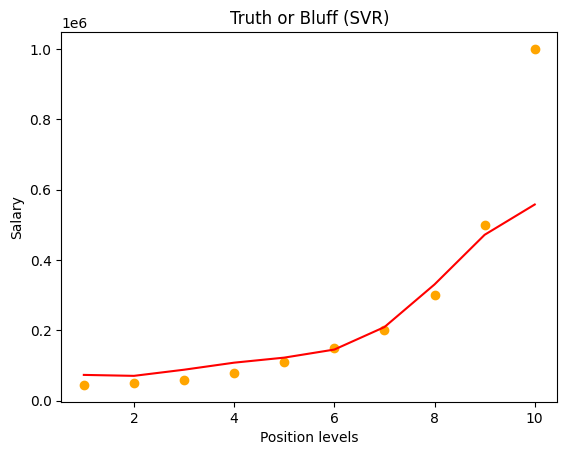

In [32]:
# To plot b/w original values , we need to inverse transform of martrix X & y.
# Scatter plots for original values
# Plot plots for predicted values

plt.scatter(sc_x.inverse_transform(X),sc_y.inverse_transform(y),color='orange')
plt.plot(sc_x.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)),color='red')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position levels')
plt.ylabel('Salary')
plt.show()

#Accurate outcomes with outliers (last one (1,10))

## Visualising the SVR results (for higher resolution and smoother curve)

<ipython-input-38-60db196d9898>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_x.inverse_transform(X)), max(sc_x.inverse_transform(X)), 0.1)     #More no of datapoints as gap is 0.1, with arranged in ascending order - density increased - (1 ,1.1 ,1.2---9.9,10)


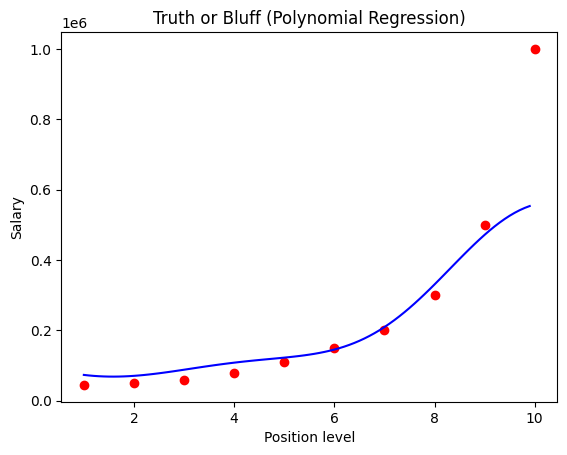

In [38]:
X_grid = np.arange(min(sc_x.inverse_transform(X)), max(sc_x.inverse_transform(X)), 0.1)     #More no of datapoints as gap is 0.1, with arranged in ascending order - density increased - (1 ,1.1 ,1.2---9.9,10)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_x.inverse_transform(X),sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid , sc_y.inverse_transform(regressor.predict(sc_x.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

#Much more accuracy & resolution obtained